**Necessary Imports**

In [ ]:
###
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
import shutil
import pathlib
import random

#model selection
from sklearn.model_selection import train_test_split

#data augumentation
import  cv2
import imgaug
import imageio
from imgaug import augmenters as iaa

##
import keras.utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.activations import selu

In [ ]:
###
import tensorflow as tf
#import tensorflow_addons as tfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
import shutil
import pathlib
import random

from keras.applications import ResNet50
#model selection
from sklearn.model_selection import train_test_split

#data augumentation
import  cv2
import imgaug
import imageio
from imgaug import augmenters as iaa

##
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.applications import VGG16
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

from keras.applications import DenseNet169
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [ ]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


**Drive Mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/MyDrive/'
save_path1 = '/content/drive/MyDrive/'

In [ ]:
!unzip /content/drive/MyDrive/NewData.zip

Archive:  /content/drive/MyDrive/NewData.zip
  inflating: NewData/TestLabels.npy  
  inflating: NewData/ValLabels.npy   
  inflating: NewData/TrainLabels.npy  
  inflating: NewData/TestData.npy    
  inflating: NewData/ValData.npy     
  inflating: NewData/TrainData.npy   


In [ ]:
#Run from here
import os
x_train = []
y_train = []
x_train = np.load("/content/NewData/TrainData.npy")
y_train = np.load("/content/NewData/TrainLabels.npy")

x_val = []
y_val = []
x_val = np.load("/content/NewData//ValData.npy")
y_val = np.load("/content/NewData//ValLabels.npy")

x_test = []
y_test = []
x_test = np.load("/content/NewData/TestData.npy")
y_test = np.load("/content/NewData//TestLabels.npy")

print(f"x_train shape: {x_train .shape} - y_train shape: {y_train .shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test .shape}")

x_train shape: (18123, 110, 110, 3) - y_train shape: (18123,)
x_val shape: (648, 110, 110, 3) - y_val shape: (648,)
x_test shape: (812, 110, 110, 3) - y_test shape: (812,)


**Training Models**

# **Fine Tunning**

In [ ]:

    base_model = DenseNet169(weights="imagenet", include_top=False)
   
 

51877672/51877672 [==============================] - 2s 0us/step


In [ ]:
base_model = DenseNet169(input_shape=(110,110,3), input_tensor=None,
                                                include_top=False, 
                                                weights='imagenet')
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)


0 input_11
1 zero_padding2d_20
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_21
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_bl

In [ ]:
for layer in base_model.layers[:249]:
        layer.trainable = False
for layer in base_model.layers[249:]:
        layer.trainable = True

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

In [ ]:
 model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
base_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 110, 110, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_16 (ZeroPadding  (None, 116, 116, 3)  0          ['input_9[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 55, 55, 64)   9408        ['zero_padding2d_16[0][0]']      
                                                                                        

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/model_densenet_ft.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
print(y_train.shape)

(18123,)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical


y_train_one_hot = to_categorical(y_train, num_classes=5)
y_val_one_hot = to_categorical(y_val, num_classes=5)


In [ ]:


epochs = 10
opt = Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
trainDenseNetFT = model.fit(x=x_train, y=y_train_one_hot, validation_data=(x_val, y_val_one_hot), epochs=50,callbacks=callbacks)

Epoch 1/50
566/567 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8955
Epoch 1: val_accuracy improved from -inf to 0.84259, saving model to saved_models/model_densenet_ft.hdf5
567/567 [==============================] - 62s 85ms/step - loss: 0.2814 - accuracy: 0.8955 - val_loss: 6.7838 - val_accuracy: 0.8426 - lr: 0.0010
Epoch 2/50
566/567 [============================>.] - ETA: 0s - loss: 0.2361 - accuracy: 0.9116
Epoch 2: val_accuracy improved from 0.84259 to 0.96914, saving model to saved_models/model_densenet_ft.hdf5
567/567 [==============================] - 45s 79ms/step - loss: 0.2360 - accuracy: 0.9116 - val_loss: 0.1228 - val_accuracy: 0.9691 - lr: 0.0010
Epoch 3/50
566/567 [============================>.] - ETA: 0s - loss: 0.2174 - accuracy: 0.9202
Epoch 3: val_accuracy improved from 0.96914 to 0.97840, saving model to saved_models/model_densenet_ft.hdf5
567/567 [==============================] - 45s 80ms/step - loss: 0.2173 - accuracy: 0.9202 - val_lo

Saving Model in GDrive

In [ ]:
 model.save(save_path + 'model_densenet_ft.hdf5')



In [ ]:
y_test_one_hot = to_categorical(y_test, num_classes=5)
accuracy =  model.evaluate(x_test, y_test_one_hot)[1]

26/26 [==============================] - 1s 46ms/step - loss: 0.1469 - accuracy: 0.9717


Evaluating Model

In [ ]:
from tensorflow.keras.models import load_model
FT_densenet= load_model(save_path + 'model_densenet_ft.hdf5')


26/26 [==============================] - 4s 40ms/step


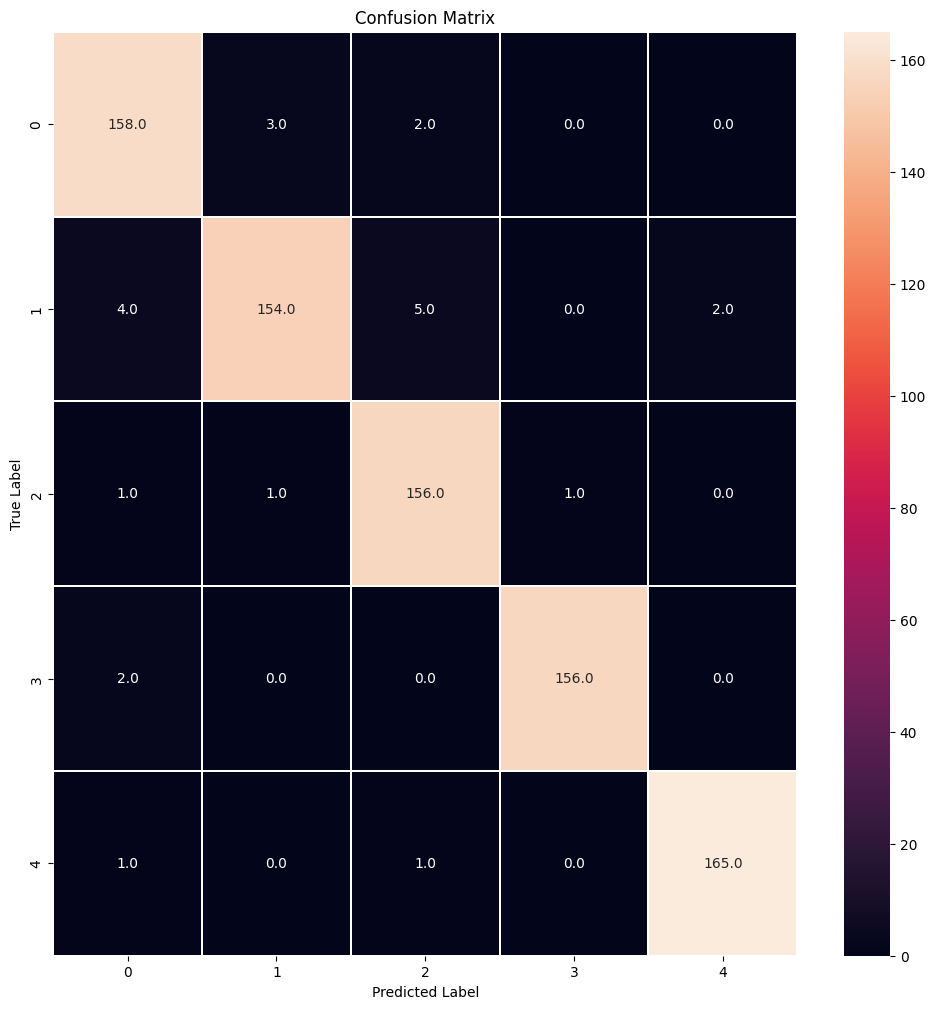

In [ ]:
cancer_classes = np.unique(y_test)
pred = FT_densenet.predict(x_test)
y_pred = np.argmax(pred, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt='.1f', ax=ax, cmap="rocket")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(cancer_classes)
ax.set_yticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report1 = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

,precision,recall,f1-score,support
0,0.951807,0.969325,0.960486,163.000000
1,0.974684,0.933333,0.953560,165.000000
2,0.951220,0.981132,0.965944,159.000000
3,0.993631,0.987342,0.990476,158.000000
4,0.988024,0.988024,0.988024,167.000000
accuracy,0.971675,0.971675,0.971675,0.971675
macro avg,0.971873,0.971831,0.971698,812.000000
weighted avg,0.971927,0.971675,0.971647,812.000000


# Cost Sensitive

In [ ]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_test), class_weight.compute_class_weight('balanced', classes = np.unique(y_test),
                                        y = y_test))) 

class_weights

{0: 0.996319018404908,
 1: 0.9842424242424243,
 2: 1.0213836477987421,
 3: 1.0278481012658227,
 4: 0.9724550898203593}

In [ ]:
modelCS_densenet=load_model(save_path + 'model_densenet_ft.hdf5')
epochs = 50
opt = Adam(learning_rate=1e-3)
modelCS_densenet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='saved_models/modelCS_densenet_CS.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=1e-5)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
modelCS_densenet.fit(x=x_train, y=y_train_one_hot, validation_data=(x_val, y_val_one_hot), epochs=50, class_weight=class_weights,callbacks=callbacks)

Epoch 1/50
567/567 [==============================] - ETA: 0s - loss: 0.1635 - accuracy: 0.9419
Epoch 1: val_accuracy improved from -inf to 0.96296, saving model to saved_models/modelCS_densenet_CS.hdf5
567/567 [==============================] - 63s 86ms/step - loss: 0.1635 - accuracy: 0.9419 - val_loss: 0.1425 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 2/50
567/567 [==============================] - ETA: 0s - loss: 0.1519 - accuracy: 0.9436
Epoch 2: val_accuracy improved from 0.96296 to 0.97685, saving model to saved_models/modelCS_densenet_CS.hdf5
567/567 [==============================] - 47s 82ms/step - loss: 0.1519 - accuracy: 0.9436 - val_loss: 0.1125 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 3/50
566/567 [============================>.] - ETA: 0s - loss: 0.1550 - accuracy: 0.9456
Epoch 3: val_accuracy improved from 0.97685 to 0.97840, saving model to saved_models/modelCS_densenet_CS.hdf5
567/567 [==============================] - 46s 81ms/step - loss: 0.1555 - accuracy: 0.9455 - 

In [ ]:
modelCS_densenet.save(save_path + 'modelCS_densenet_CS.hdf5')
#modelCS_VGG16.save_weights(save_path1 + "Weights_FTCS_VGG16.h5")


In [ ]:
y_test_one_hot = to_categorical(y_test, num_classes=5)
accuracy = modelCS_densenet.evaluate(x_test, y_test_one_hot)[1]

26/26 [==============================] - 1s 42ms/step - loss: 0.1650 - accuracy: 0.9729


In [ ]:
CS_densenet= load_model(save_path + 'modelCS_densenet_CS.hdf5')

26/26 [==============================] - 4s 37ms/step


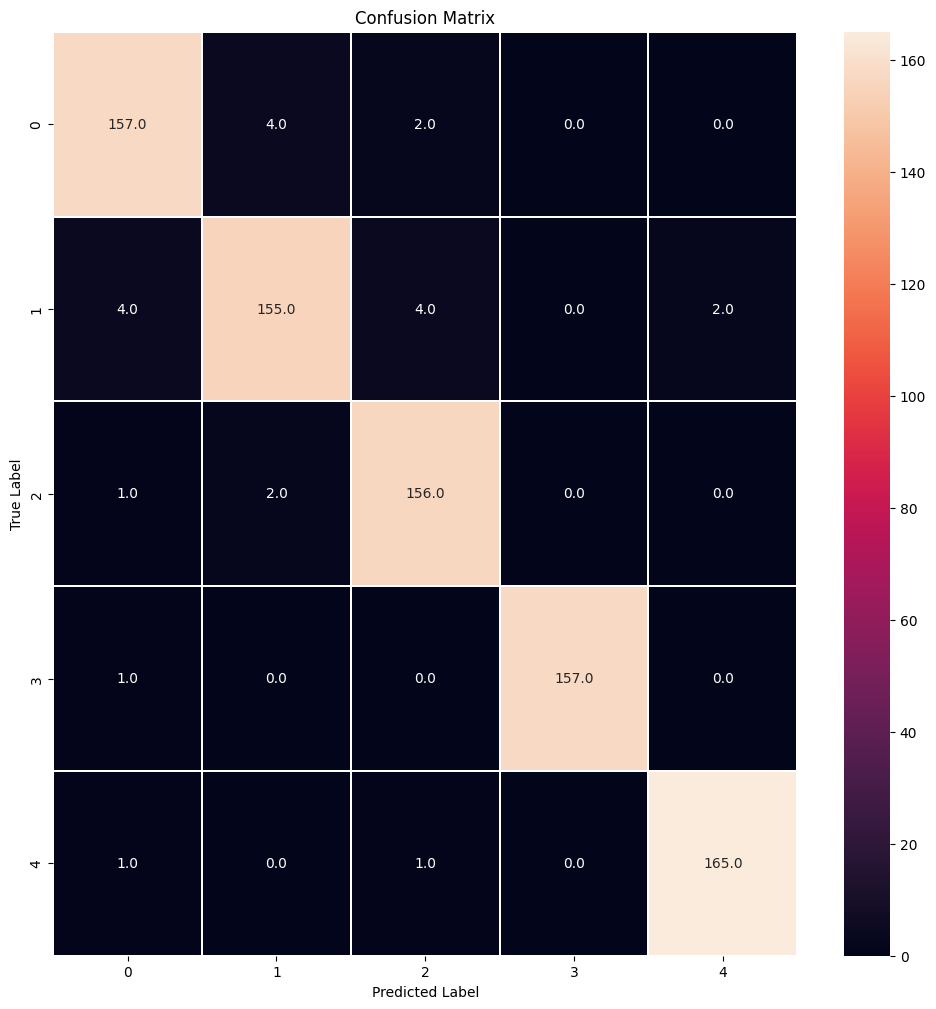

In [ ]:
cancer_classes = np.unique(y_test)
pred = CS_densenet.predict(x_test)
y_pred = np.argmax(pred, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt='.1f', ax=ax, cmap="rocket")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(cancer_classes)
ax.set_yticklabels(cancer_classes)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
report12 = classification_report(y_test, y_pred, target_names=cancer_classes, output_dict=True)
df12 = pd.DataFrame(report12).transpose()
df12

,precision,recall,f1-score,support
0,0.957317,0.963190,0.960245,163.000000
1,0.962733,0.939394,0.950920,165.000000
2,0.957055,0.981132,0.968944,159.000000
3,1.000000,0.993671,0.996825,158.000000
4,0.988024,0.988024,0.988024,167.000000
accuracy,0.972906,0.972906,0.972906,0.972906
macro avg,0.973026,0.973082,0.972992,812.000000
weighted avg,0.972987,0.972906,0.972885,812.000000
